In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [2]:
metro_pd = pd.read_csv('../CoVID-19_Dashboard_Data.csv')

In [3]:
type(metro_pd.Date[0])

str

In [4]:
metro_pd.Date = pd.to_datetime(metro_pd.Date)

In [5]:
type(metro_pd.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
a = metro_pd.set_index('Date')

In [7]:
a.index

DatetimeIndex(['2020-02-12 06:00:00', '2020-02-13 06:00:00',
               '2020-02-14 06:00:00', '2020-02-15 06:00:00',
               '2020-02-16 06:00:00', '2020-02-17 06:00:00',
               '2020-02-18 06:00:00', '2020-02-19 06:00:00',
               '2020-02-20 06:00:00', '2020-02-21 06:00:00',
               ...
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT'],
              dtype='datetime64[ns]', name='Date', length=178, freq=None)

In [8]:
b = a.loc[a.index.dropna()]

In [9]:
b

,ObjectId,ReportedOn,ReportedCum,Deceased,Recovered,Hospitalized,ICU,Vent,StillIll,PosPatients,...,BCLabTests,BCTestNegative,BCTestPositive,BCTestInc,DBCLabTests,DBCTestNegative,DBCTestPositive,DBCTestInc,WeekQuar,EverQuar
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-12 06:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-13 06:00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14 06:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-15 06:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16 06:00:00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-02 05:00:00,142,374.0,12878.0,4.0,5150.0,802.0,297.0,127.0,7613.0,1074.0,...,147164.0,130751.0,16304.0,109.0,5438.0,4125.0,1306.0,7.0,NaN,NaN
2020-07-03 05:00:00,143,1334.0,14212.0,2.0,5549.0,830.0,302.0,129.0,8546.0,1089.0,...,152370.0,134899.0,17360.0,111.0,5206.0,4150.0,1056.0,2.0,NaN,NaN
2020-07-04 05:00:00,144,341.0,14553.0,5.0,5633.0,848.0,304.0,129.0,8798.0,1120.0,...,153849.0,136019.0,17719.0,111.0,1479.0,1120.0,359.0,0.0,NaN,NaN


In [10]:
type(metro_pd.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
c = b['PosPatients'].dropna()

In [12]:
type(c.index[0])

pandas._libs.tslibs.timestamps.Timestamp

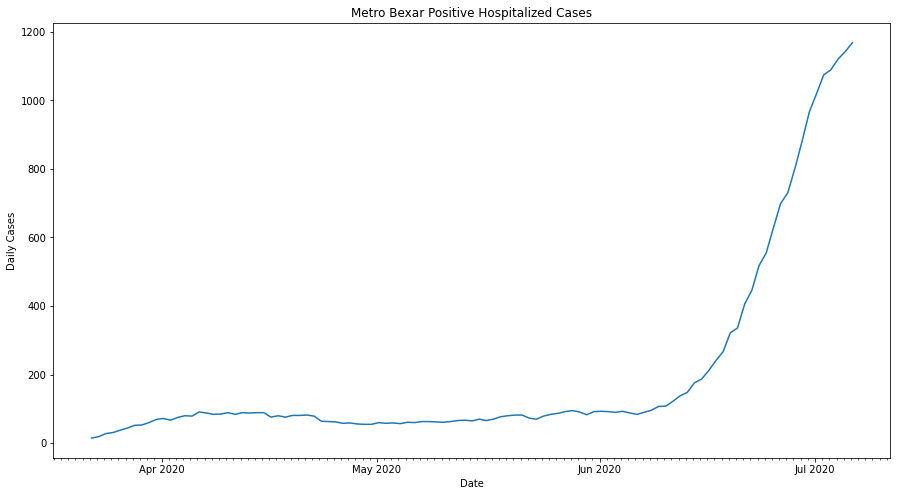

In [13]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Daily Cases',color='black')
plt.title('Metro Bexar Positive Hospitalized Cases')
#plt.bar(c.index,c)
plt.plot(c)
fig.savefig('MetroPosHospitalized.png')

In [14]:
c

Date
2020-03-22 06:00:00      15.0
2020-03-23 06:00:00      19.0
2020-03-24 06:00:00      28.0
2020-03-25 06:00:00      31.0
2020-03-26 06:00:00      38.0
                        ...  
2020-07-02 05:00:00    1074.0
2020-07-03 05:00:00    1089.0
2020-07-04 05:00:00    1120.0
2020-07-05 05:00:00    1142.0
2020-07-06 05:00:00    1168.0
Name: PosPatients, Length: 107, dtype: float64

In [15]:
x = c.diff(periods = 1)

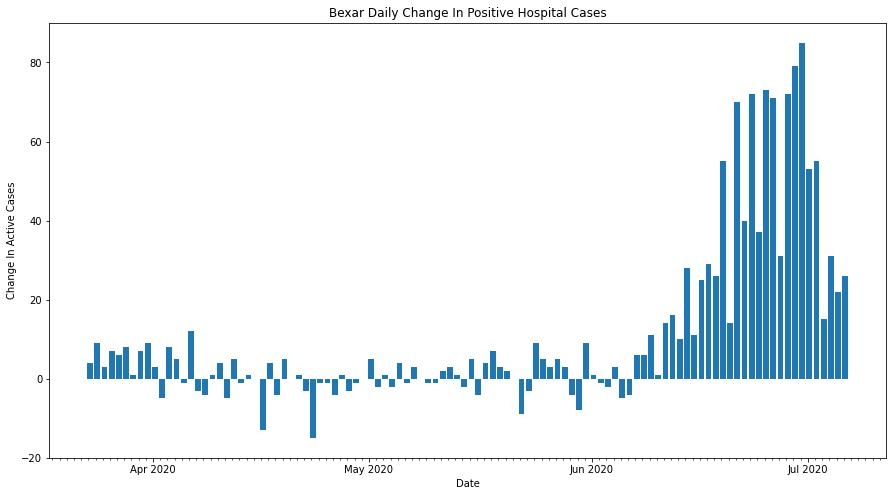

In [16]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Change In Active Cases',color='black')
plt.title('Bexar Daily Change In Positive Hospital Cases')
plt.bar(x.index,x)
fig.savefig('BexarChangeInPosHospitalCases.png')

In [17]:
x

Date
2020-03-22 06:00:00     NaN
2020-03-23 06:00:00     4.0
2020-03-24 06:00:00     9.0
2020-03-25 06:00:00     3.0
2020-03-26 06:00:00     7.0
                       ... 
2020-07-02 05:00:00    55.0
2020-07-03 05:00:00    15.0
2020-07-04 05:00:00    31.0
2020-07-05 05:00:00    22.0
2020-07-06 05:00:00    26.0
Name: PosPatients, Length: 107, dtype: float64